In [1]:
from google.colab import files
 
 
uploaded = files.upload()

Saving LabTAT.csv to LabTAT.csv


In [ ]:
# Hypothesis Testing : 
#Null hypothesis (H0): There is no difference in average TAT among the different laboratories.
# Alternative hypothesis (Ha): There is a difference in average TAT among the different laboratories.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
Lab_tat_data = pd.read_csv("LabTAT.csv")

In [3]:
Lab_tat_data

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [4]:
Lab_tat_data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [5]:
Lab_tat_data.shape

(120, 4)

In [6]:
Lab_tat_data.dtypes

Laboratory 1    float64
Laboratory 2    float64
Laboratory 3    float64
Laboratory 4    float64
dtype: object

In [7]:
Lab_tat_data.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [8]:
Lab_tat_data.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


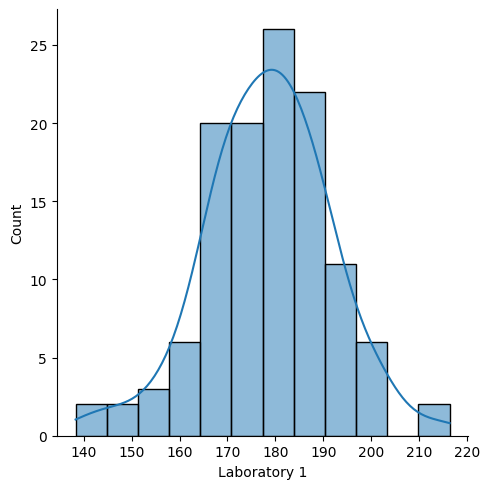

In [14]:
sns.displot(Lab_tat_data['Laboratory 1'], kde=True)

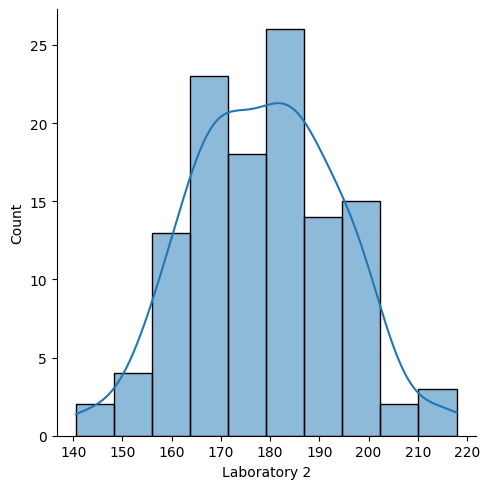

In [15]:
sns.displot(Lab_tat_data['Laboratory 2'], kde=True)

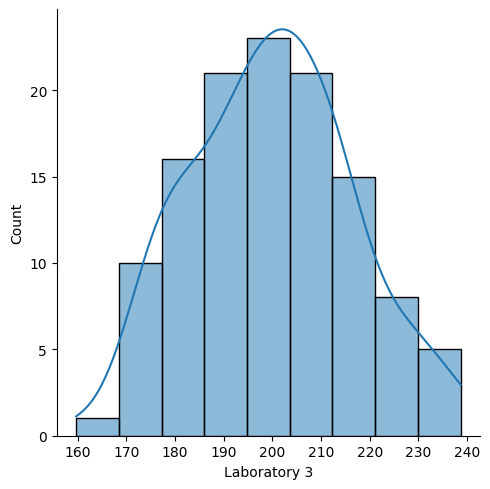

In [16]:
sns.displot(Lab_tat_data['Laboratory 3'], kde=True)

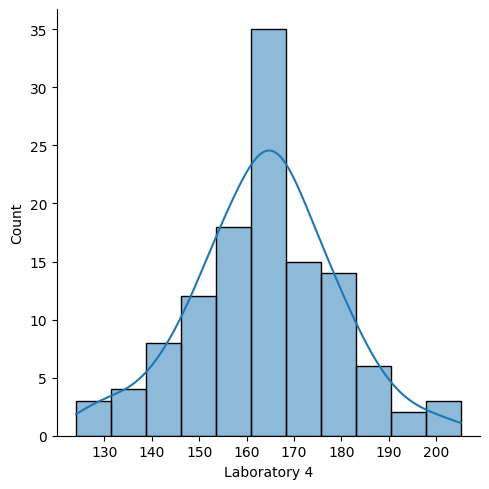

In [17]:
sns.displot(Lab_tat_data['Laboratory 4'], kde=True)

<Axes: >

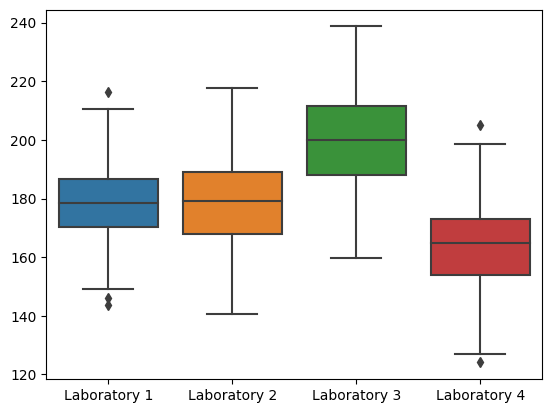

In [29]:
sns.boxplot(Lab_tat_data)

In [34]:
# removing outliers using IQR Method
Lab_data = Lab_tat_data
# calculate the IQR for each column
Q1 = Lab_data.quantile(0.25)
Q3 = Lab_tat_data.quantile(0.75)
IQR = Q3 - Q1

# filter the rows that fall outside the IQR range
Lab_data= Lab_data[~((Lab_data < (Q1 - 1.5 * IQR)) | (Lab_data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [35]:
Lab_data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


<Axes: >

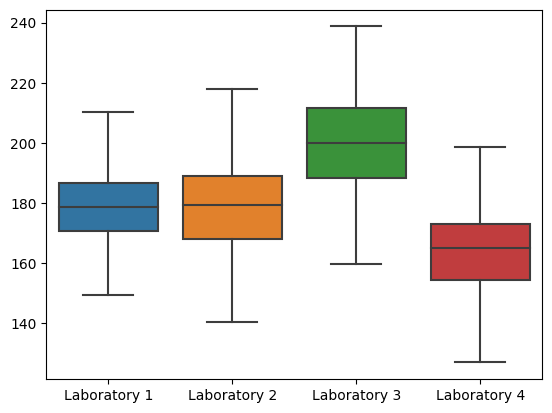

In [36]:
sns.boxplot(Lab_data)

In [38]:

# calculate the one-way ANOVA test statistic and p-value
f_stat, p_val = stats.f_oneway(Lab_data['Laboratory 1'], Lab_data['Laboratory 2'], Lab_data['Laboratory 3'], Lab_data['Laboratory 4'])

# set the significance level
alpha = 0.05

# print the results of the hypothesis test
if p_val < alpha:
    print("There is a significant difference in average TAT among the different laboratories (p < 0.05)")
else:
    print("There is no significant difference in average TAT among the different laboratories (p >= 0.05)")


There is a significant difference in average TAT among the different laboratories (p < 0.05)


In [ ]:
# Conclusion : Rejecting the null hypothesis and concluded that there is a significant difference in average TAT among the different laboratories. 